In [25]:
# Import the standard modules
import sqlite3

# Import the installed modules
import pandas as pd
import numpy as np

# Import matplotlib for plotting
from matplotlib import pyplot as plt

In [26]:
# Connect to the comet database. This database has been created in tutorial
# part 7, however, due to its small size the database is uploaded on GitHub
con = sqlite3.connect('../databases/comets/mpc_comets.db')

# Create a pandas dataframe that contains the aphelion and inclination data
# for P type ...
p_type_df = pd.read_sql('SELECT APHELION_AU, INCLINATION_DEG ' \
                        'FROM comets_main WHERE ORBIT_TYPE="P"', con)

# ... and C type comets. For this type: include also the eccentricity
c_type_df = pd.read_sql('SELECT APHELION_AU, INCLINATION_DEG, ECCENTRICITY ' \
                        'FROM comets_main WHERE ORBIT_TYPE="C"', con)

In [27]:
# It appears that the aphelion and inclination values of the C comets are more
# dispersed than the P comet values. P comets are more "concentrated" in the
# inner part of the Solar System. Since we will have a closer look on P comets
# another time, let's have a look at the inclination distribution of the
# comets.
#
# "From which direction do they come from" (w.r.t. ECLIPJ2000)?

# We analyse the complete inclination definition range. So let's set an array
# that covers 0 to 180 degrees
incl_range = np.linspace(0, 180, 1000)

# Two plots will be created. First: a histogram. A rule-of-thumb is defined in
# this lambda function: the floor value of the square-root of the total number
# of observations is used
nr_of_bins = lambda data_array: int(np.floor(np.sqrt(len(data_array))))

In [28]:
# Second: To derive a continuous distribution a Kernel-Density Estimator (KDE)
# is used. We apply the standard settings. Import the scipy module first
from scipy import stats

# Kernel and distribution computation for the P type comets
p_type_inc_kernel = stats.gaussian_kde(p_type_df['INCLINATION_DEG'])
p_type_inc_distr = p_type_inc_kernel(incl_range)

# Kernel and distribution computation for the C type comets
c_type_inc_kernel = stats.gaussian_kde(c_type_df['INCLINATION_DEG'])
c_type_inc_distr = c_type_inc_kernel(incl_range)

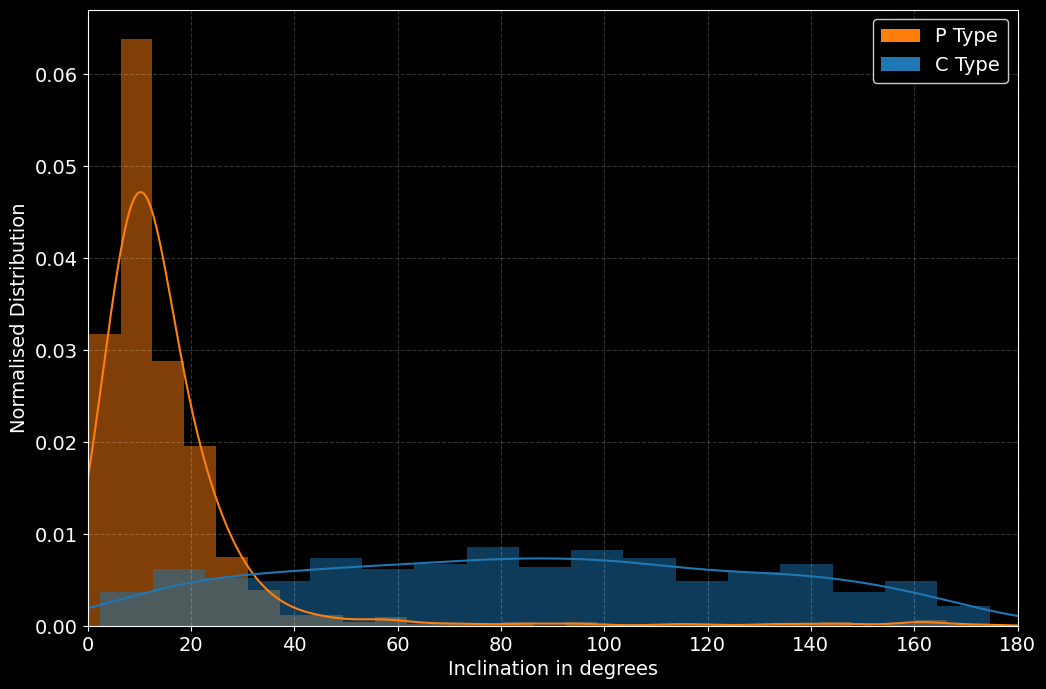

In [30]:
# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Histogram of the P and C type comets' inclination.
ax.hist(p_type_df['INCLINATION_DEG'], \
        bins=nr_of_bins(p_type_df['INCLINATION_DEG']), \
        density=True, color='tab:orange', alpha=0.5, label='P Type')

ax.hist(c_type_df['INCLINATION_DEG'], \
        bins=nr_of_bins(c_type_df['INCLINATION_DEG']), \
        density=True, color='tab:blue', alpha=0.5, label='C Type')

# Plot the KDE of the P type comets
ax.plot(incl_range, p_type_inc_distr, color='tab:orange', alpha=1, linestyle='solid')

# Plot the KDE of the C type comets
ax.plot(incl_range, c_type_inc_distr, color='tab:blue', alpha=1, linestyle='solid')

# Set an x axis limits (inclination range)
ax.set_xlim(0, 180)

# Add a grid for better readability
ax.grid(axis='both', linestyle='dashed', alpha=0.2)

# Set an x and y label
ax.set_xlabel('Inclination in degrees')
ax.set_ylabel('Normalised Distribution')

# Again: We re-define the opacity (alpha value) of the markers / lines in the
# legend for better visibility
leg = ax.legend(fancybox=True, loc='upper right', framealpha=1)
for lh in leg.get_patches():  # For patches (like histograms)
    lh.set_alpha(1)

# Save the figure
plt.savefig('comets_kde_incl_.png', dpi=300)